In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
import random
import numpy as np
import os
import pandas as pd
import innvestigate
import matplotlib.pyplot as plt
import pickle

In [2]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\cnn_attention_gru_list.pkl", "rb") as f:
    cnn_attention_gru = pickle.load(f)

In [3]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\standard_scaler.pkl", "rb") as f:
    standard_scaler = pickle.load(f)

In [4]:
standard_scaler

StandardScaler()

In [57]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\X_resampling.pkl", "rb") as f:
    X_resampling = pickle.load(f)

In [58]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\y_resampling.pkl", "rb") as f:
    y_resampling = pickle.load(f)

In [89]:
def XAI_pred(model, random_number):
    print(random_number)
    print("Real Label: ", y_resampling[random_number])

    pred = model.predict(X_resampling[random_number].reshape(1, 24, 1))
    prediction = np.argmax(pred)
    print(prediction)

    
    analyzer = innvestigate.create_analyzer('input', cnn_attention_gru[3])
    relevance = analyzer.analyze(X_resampling[random_number].reshape(1, 24, 1))

    # Ubah ndarray menjadi list
    relevance_list = relevance.squeeze().tolist()

    # Urutkan list secara menurun
    sorted_relevance = sorted(enumerate(relevance_list), key=lambda x: x[1], reverse=True)

    # Ambil 50 elemen pertama setelah diurutkan
    top_50_relevance = sorted_relevance[:50]

    # Buat dictionary dari hasil urutan dengan indeks sebagai kunci dan nilai sebagai nilai
    top_50_dict = {index: value for index, value in top_50_relevance}

    print(top_50_dict)

    # Filter nilai yang di atas 0.0 dan ambil indeksnya
    filtered_indices = [index for index, value in enumerate(relevance_list) if value > 0.0]

    print(filtered_indices)
    
    relevance_resized = np.resize(relevance, (1, 24, 1))

    plt.figure(figsize=(20, 5))
    plt.imshow(relevance_resized, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.show()

Model Number:  1
670
Real Label:  4
1/1 [==============================] - 0s 27ms/step
4
{17: 4.31443977355957, 16: 3.0964066982269287, 21: 2.872837781906128, 20: 2.4359536170959473, 13: 2.2976324558258057, 12: 2.164055824279785, 0: 1.8868669271469116, 2: 1.8027632236480713, 3: 1.5554418563842773, 6: 1.5374839305877686, 9: 1.25870680809021, 8: 1.1735128164291382, 18: 0.9299838542938232, 14: 0.8988940119743347, 1: 0.8089308142662048, 15: 0.5389112830162048, 4: 0.45972415804862976, 19: 0.4391455054283142, 7: 0.3078788220882416, 10: -0.2009396255016327, 5: -0.3370502293109894, 23: -0.8254484534263611, 11: -0.8712649941444397, 22: -1.6601074934005737}
[0, 1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


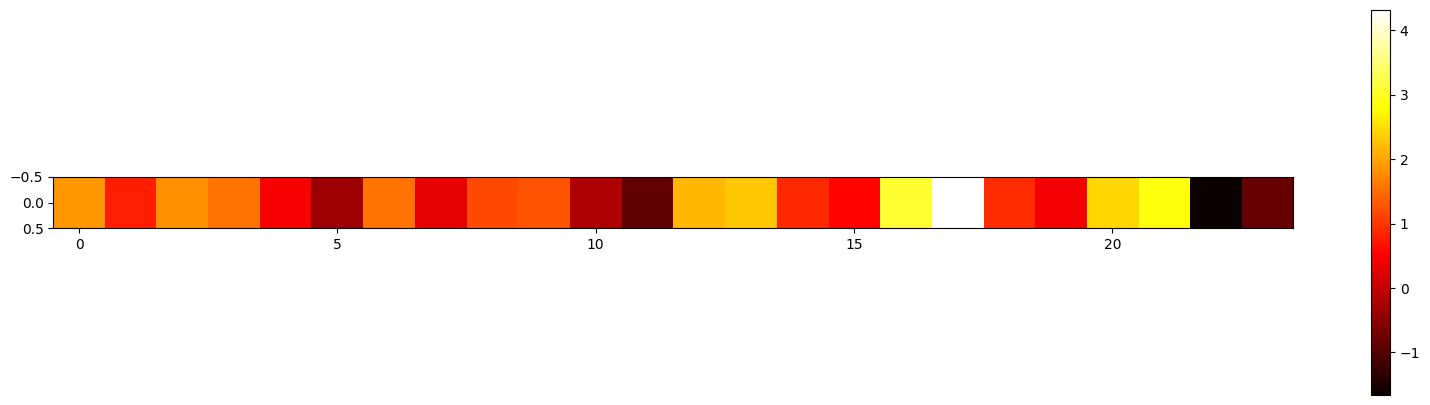

Model Number:  2
670
Real Label:  4
1/1 [==============================] - 0s 23ms/step
4
{17: 4.31443977355957, 16: 3.0964066982269287, 21: 2.872837781906128, 20: 2.4359536170959473, 13: 2.2976324558258057, 12: 2.164055824279785, 0: 1.8868669271469116, 2: 1.8027632236480713, 3: 1.5554418563842773, 6: 1.5374839305877686, 9: 1.25870680809021, 8: 1.1735128164291382, 18: 0.9299838542938232, 14: 0.8988940119743347, 1: 0.8089308142662048, 15: 0.5389112830162048, 4: 0.45972415804862976, 19: 0.4391455054283142, 7: 0.3078788220882416, 10: -0.2009396255016327, 5: -0.3370502293109894, 23: -0.8254484534263611, 11: -0.8712649941444397, 22: -1.6601074934005737}
[0, 1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


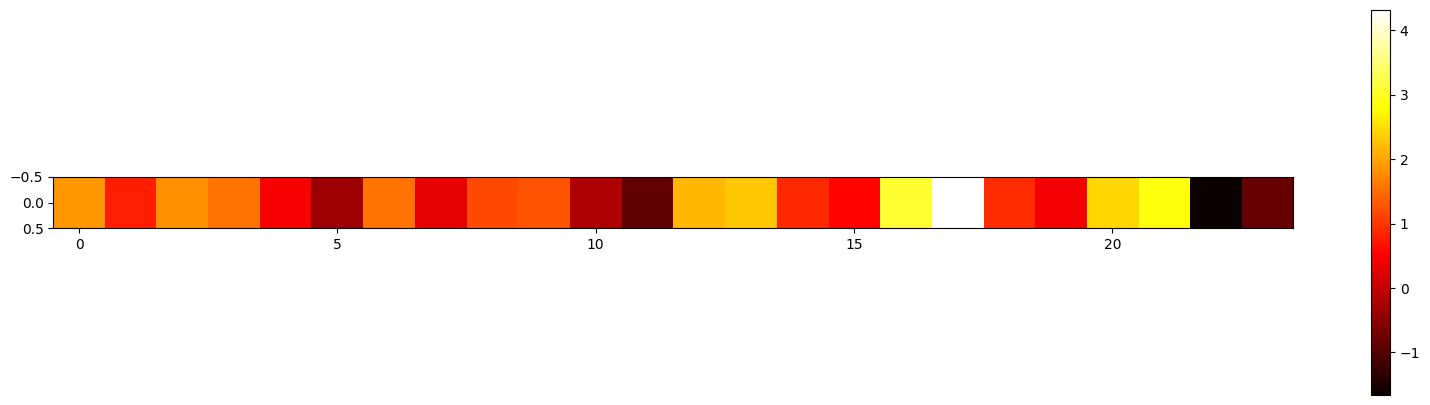

Model Number:  3
670
Real Label:  4
1/1 [==============================] - 0s 24ms/step
4
{17: 4.31443977355957, 16: 3.0964066982269287, 21: 2.872837781906128, 20: 2.4359536170959473, 13: 2.2976324558258057, 12: 2.164055824279785, 0: 1.8868669271469116, 2: 1.8027632236480713, 3: 1.5554418563842773, 6: 1.5374839305877686, 9: 1.25870680809021, 8: 1.1735128164291382, 18: 0.9299838542938232, 14: 0.8988940119743347, 1: 0.8089308142662048, 15: 0.5389112830162048, 4: 0.45972415804862976, 19: 0.4391455054283142, 7: 0.3078788220882416, 10: -0.2009396255016327, 5: -0.3370502293109894, 23: -0.8254484534263611, 11: -0.8712649941444397, 22: -1.6601074934005737}
[0, 1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


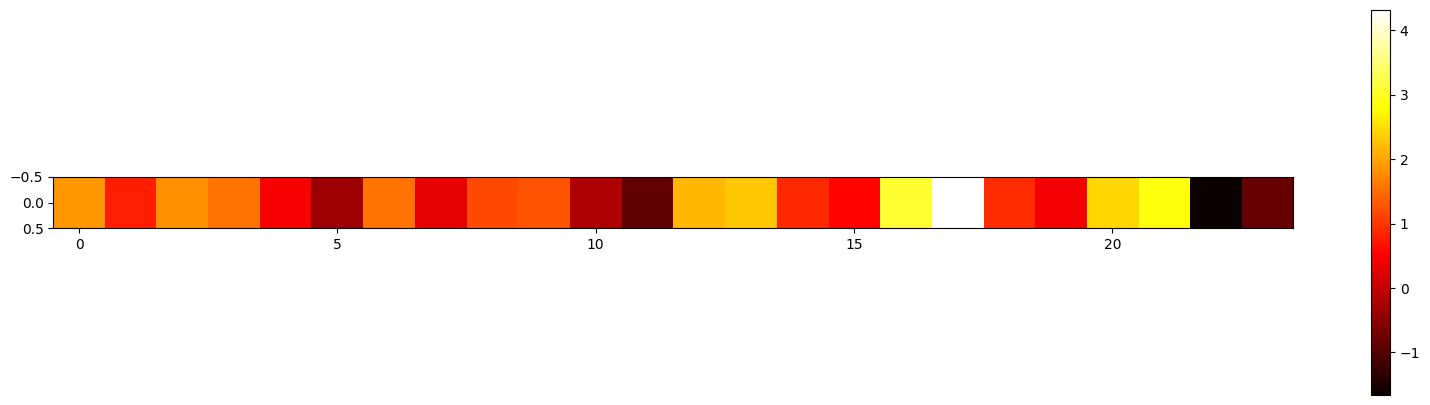

Model Number:  4
670
Real Label:  4
1/1 [==============================] - 0s 22ms/step
4
{17: 4.31443977355957, 16: 3.0964066982269287, 21: 2.872837781906128, 20: 2.4359536170959473, 13: 2.2976324558258057, 12: 2.164055824279785, 0: 1.8868669271469116, 2: 1.8027632236480713, 3: 1.5554418563842773, 6: 1.5374839305877686, 9: 1.25870680809021, 8: 1.1735128164291382, 18: 0.9299838542938232, 14: 0.8988940119743347, 1: 0.8089308142662048, 15: 0.5389112830162048, 4: 0.45972415804862976, 19: 0.4391455054283142, 7: 0.3078788220882416, 10: -0.2009396255016327, 5: -0.3370502293109894, 23: -0.8254484534263611, 11: -0.8712649941444397, 22: -1.6601074934005737}
[0, 1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


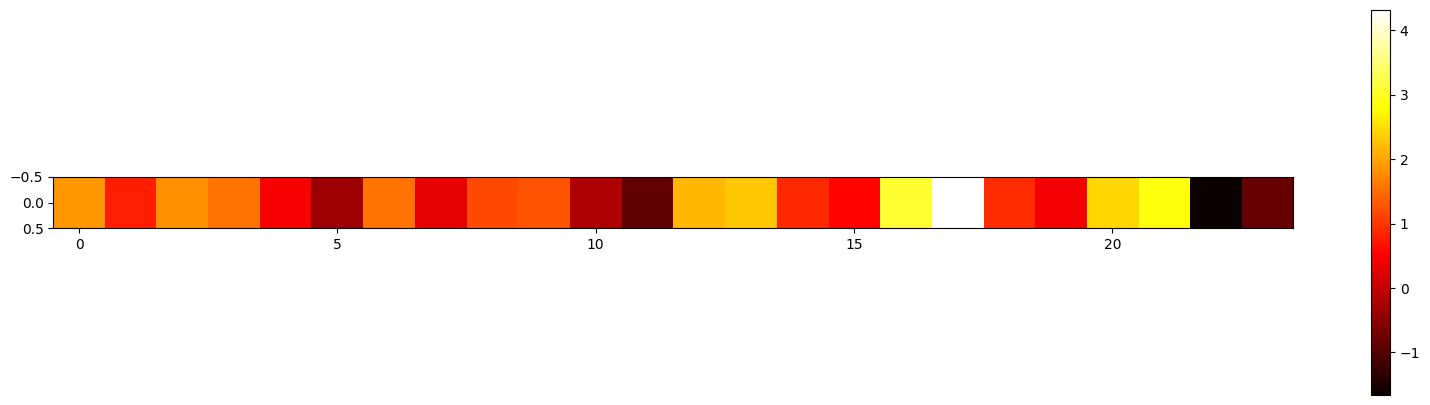

Model Number:  5
670
Real Label:  4
1/1 [==============================] - 0s 26ms/step
4
{17: 4.31443977355957, 16: 3.0964066982269287, 21: 2.872837781906128, 20: 2.4359536170959473, 13: 2.2976324558258057, 12: 2.164055824279785, 0: 1.8868669271469116, 2: 1.8027632236480713, 3: 1.5554418563842773, 6: 1.5374839305877686, 9: 1.25870680809021, 8: 1.1735128164291382, 18: 0.9299838542938232, 14: 0.8988940119743347, 1: 0.8089308142662048, 15: 0.5389112830162048, 4: 0.45972415804862976, 19: 0.4391455054283142, 7: 0.3078788220882416, 10: -0.2009396255016327, 5: -0.3370502293109894, 23: -0.8254484534263611, 11: -0.8712649941444397, 22: -1.6601074934005737}
[0, 1, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


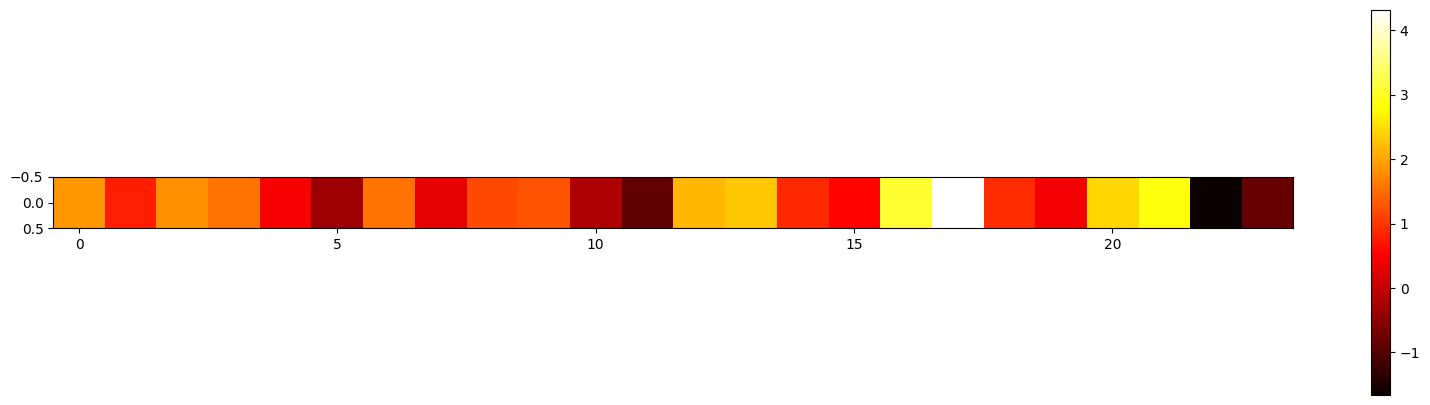

In [92]:
random_number = random.randint(0, 4129)
for i, model in enumerate(cnn_attention_gru):
    print("Model Number: ", i+1)
    XAI_pred(model, random_number)